In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")

<h3>Кармазин Василий ПИН-43</h3>
<br><br>
<center>
    <h1>Лабораторная работа №1</h1>
    <h2>Моделирование измерения скорости полёта пули</h2>
</center>

<h3>Цель работы:</h3>
Исследовать три модели измерения скорости пули.

<center>
    <h3>1. Модель, использующая силу притяжения земли.</h3>
</center>

<h4>Описание модели:</h4>
Стрельба строго в горизонтальном направлении с
измерением дальности полета пули. Ружье жестко закреплено параллельно
земле на высоте h.

В данной модели мы предполагаем, что:
- нет сопротивления воздуха
- выстрел производится параллельно поверхности земли, т.е. горизонтально
- стрельба происходит без отдачи, за счет массы стенда
- не учитывается кривизна земли
- не учитывается погрешность ружья

<h4>Дано:</h4>

- $h = 1\ м$, высота установки
- $g = 9.81\ м/с^2$, ускорение свободного падения
- $v = 800\ м/с$, эталонная скорость пули

In [2]:
h = 1
g = 9.81
V_mean = 800

<h4>Построение модели:</h4>

Составим уравнения координат полёта пули

\begin{cases} 
x = vt \\
y = h - \dfrac{gt^2}{2}
\end{cases}

$x$ - координата пули по горизонтали

$y$ - координата пули по вертикали

$h$ - высота установки

$g$ - ускорение свободного падения

$v$ - начальная скорость пули

$t$ - время полёта пули

Пусть $L$ - расстоянеие, которое пролетеля пуля, тогда из уравнений получим

\begin{cases} 
L = vt \\
0 = h - \dfrac{gt^2}{2}
\end{cases}

Выразим из системы скорость $v$

\begin{cases} 
v = \dfrac{L}{t} \\
t = \sqrt{\dfrac{gt^2}{2}}
\end{cases}

Исключая время $t$ из системы, получаем

<center>
    $v=L\sqrt{\dfrac{2}{gt^2}}$
</center>

In [3]:
def t():
    return np.sqrt(2*h/g)

def V(L):
    return L / t()

<h4>Проверка модели:</h4>

Проведём $N_{exp} = 100$ экспериментов, с различным расстоянием, которое пролетела пуля

In [4]:
N_exp = 100

Зная эталонную скорость пули в $V_{mean} = 800\ м/с$, найдём математическое ожидание пройдённого пулей расстояния $L_{mean}$

Считаем, что ошибка равна $L_{std} = 1\%$  от расстояния

In [5]:
L_mean = V_mean*t()
L_std = L_mean*0.01
print(f'Mean: {L_mean}\nStd: {L_std}')

Mean: 361.2189127885847
Std: 3.612189127885847


Будем семплировать пройденное расстояние $L_{exp}$ из нормального распределения с данными параметрами

Посмотрим на результаты модели $V_{exp}$ для данной выборки

In [6]:
L_exp = np.random.normal(L_mean, L_std, N_exp)
V_exp = V(L_exp)

In [7]:
exp_df = pd.DataFrame({'L': L_exp, 'V': V_exp})
exp_df.head(10)

,L,V
0,364.648106,807.594714
1,357.620531,792.030578
2,360.062354,797.438543
3,355.030359,786.294066
4,359.422072,796.020494
5,361.903923,801.517107
6,358.784231,794.607852
7,356.129978,788.729418
8,360.387969,798.159688
9,357.987594,792.843523


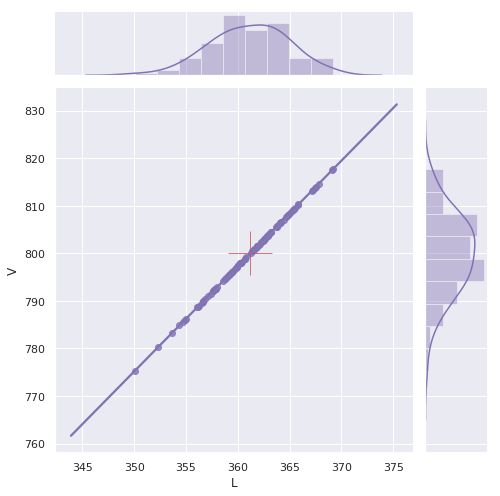

In [8]:
sns.jointplot('L', 'V', data=exp_df, kind='reg', color='m', height=7);
sns.scatterplot([L_mean], [V_mean], color='r', marker='+', s=2000);

In [9]:
exp_df.describe()

,L,V
count,100.000000,100.000000
mean,361.109295,799.757228
std,3.740231,8.283578
min,350.061541,775.289508
25%,358.809011,794.662735
50%,361.469877,800.555817
75%,363.844473,805.814889
max,369.197778,817.670979


<center>
    <h3>2. Модель, использующая закон сохранения энергии.</h3>
</center>

<h4>Описание модели:</h4>
Стрельба строго в горизонтальном направлении по ящику с песком массы $M$, закрепленном на стержне длинны $l$. Пуля массы $m$ попадает в ящик, стержень отклоняется на угол $a$.

В данной модели мы предполагаем, что:
- нет сопротивления воздуха
- стержень нерастяжим
- вся кинетическая энергия движения пули переходит в кинетическую энергию ящика с песком и пулей

<h4>Дано:</h4>

- $l = 5\ м$, длина стержня
- $g = 9.81\ м/с^2$, ускорение свободного падения
- $a = \dfrac{\pi}{12}\ rad$, эталонный угол отклонения
- $M = 10\ кг$, масса мешка с песком
- $m = 0.01\ кг$, масса пули

In [10]:
l = 5
g = 9.81
a_mean = np.pi/12
M = 10
m = 0.01

<h4>Построение модели:</h4>

Пуля, застрявшая в грузе, сообщит системе “пуля-груз” свою кинетическую энергию, которая в момент наибольшего отклонения стержня от вертикали полностью перейдет в потенциальную энергию системы. 

<br>
<center>
    <b>Закон сохранения энергии</b>
</center>
<center>
    $E_{к} = \dfrac{mv^2}{2},\ E_{п} = mgh$
</center>

<center>
    $E_{к_{пуля}} = E_{к_{пуля-груз}} = E_{п_{пуля-груз}}$
</center>

Использовав ЗСЭ получим цепочку равенств

<center>
    $\dfrac{mv^2}{2} = \dfrac{(m+M)u^2}{2} = (m+M)gl(1-\cos{a})$
</center>

- $M$ - масса груза
- $m$ - масса пули
- $v$ - начальная скорость пули
- $u$ - скорость системы "пуля-груз" после столкноения
- $g$ - ускорение свободного падения
- $a$ - угол наибольшего отклонения
- $l$ - длина стержня

Из цепочки получаем 

<center>
    $\dfrac{mv^2}{2} = (m+M)gl(1-\cos{a})$
</center>

Выражая скорость пули $v$, получаем формулу

<center>
    $v=\sqrt{\dfrac{2(m+M)gl(1-\cos{a})}{m}}$
</center>

Выразим угол отклонения стержня $a$ для его оценки

<center>
    $a=\arccos{\left(1 - \dfrac{mv^2}{2(m+M)gl}\right)}$
</center>

In [11]:
def alpha(v):
    return np.arccos(1 - (m*v**2)/(2*(m+M)*g*l))

def V(a):
    return np.sqrt((2*(m+M)*g*l*(1-np.cos(a)))/m)

<h4>Проверка модели:</h4>

Проведём $N_{exp} = 100$ экспериментов, с различным отклонением стержня установки

In [12]:
N_exp = 100

Зная эталонный угол отклонения стержня $a_{mean}$, найдём математическое ожидание скорости пули $V_{mean}$

Считаем, что ошибка равна $V_{std} = 1\%$ от скорости

In [13]:
V_mean = V(a_mean)
V_std = V_mean*0.01
print(f'Mean: {V_mean}\nStd: {V_std}')

Mean: 57.84478470427079
Std: 0.5784478470427079


Будем семплировать угол отклонения $a_{exp}$ в радианах из нормального распределения с данными параметрами

Посмотрим на результаты модели $V_{exp}$ для данной выборки

In [14]:
V_exp = np.random.normal(V_mean, V_std, N_exp)
a_exp = alpha(V_exp)

In [15]:
energy_exp_df = pd.DataFrame({
    'a_rad': a_exp, 'a_deg': np.rad2deg(a_exp), 
    'V': V_exp
})
energy_exp_df.head(10)

,a_rad,a_deg,V
0,0.264390,15.148406,58.413764
1,0.258400,14.805211,57.097830
2,0.262135,15.019255,57.918613
3,0.262279,15.027485,57.950170
4,0.262644,15.048413,58.030407
5,0.265757,15.226736,58.714037
6,0.258747,14.825123,57.174193
7,0.262609,15.046390,58.022653
8,0.261304,14.971613,57.735939
9,0.266282,15.256809,58.829314


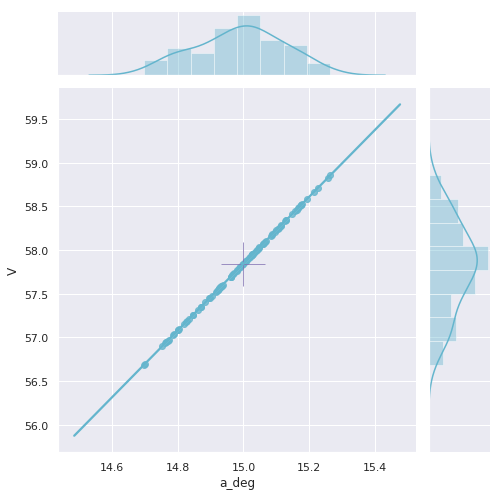

In [16]:
sns.jointplot('a_deg', 'V', data=energy_exp_df, 
              kind='reg', color='c', height=7);
sns.scatterplot([np.rad2deg(a_mean)], [V_mean], 
                color='m', marker='+', s=2000);

In [17]:
energy_exp_df.describe()

,a_rad,a_deg,V
count,100.000000,100.000000,100.000000
mean,0.261588,14.987914,57.798405
std,0.002309,0.132276,0.507194
min,0.256534,14.698332,56.687908
25%,0.260090,14.902062,57.469243
50%,0.261787,14.999316,57.842164
75%,0.263256,15.083451,58.164741
max,0.266396,15.263351,58.854389


<center>
    <h3>3. Модель, использующая закон сохранения импульса и энергии.</h3>
</center>

<h4>Описание модели:</h4>
Стрельба строго в горизонтальном направлении по ящику с песком массы $M$, закрепленном на стержне длинны $l$. Пуля массы $m$ попадает в ящик, стержень отклоняется на угол $a$.

В данной модели мы предполагаем, что:
- нет сопротивления воздуха
- стержень нерастяжим
- вся кинетическая энергия движения пули переходит в кинетическую энергию ящика с песком и пулей

<h4>Дано:</h4>

- $l = 5\ м$, длина стержня
- $g = 9.81\ м/с^2$, ускорение свободного падения
- $a = \dfrac{\pi}{12}\ rad$, эталонный угол отклонения
- $M = 10\ кг$, масса мешка с песком
- $m = 0.01\ кг$, масса пули

In [18]:
l = 5
g = 9.81
a_mean = np.pi/12
M = 10
m = 0.01

<h4>Построение модели:</h4>

Пуля, застрявшая в грузе, сообщит системе “пуля-груз” свой импульс и  кинетическую энергию, которая в момент наибольшего отклонения стержня от вертикали полностью перейдет в потенциальную энергию системы. 

<br>
<center>
    <b>Закон сохранения испульса</b>
</center>
<center>
    $mv = (M+m)u$
</center>

- $M$ - масса груза
- $m$ - масса пули
- $v$ - начальная скорость пули
- $u$ - скорость системы "пуля-груз" после столкноения

Выразим скорость после столкновения $u$
<center>
    $u = \dfrac{mv}{M+m}$
</center>

<br>
<center>
    <b>Закон сохранения энергии</b>
</center>
<center>
    $E_{к} = \dfrac{mv^2}{2},\ E_{п} = mgh$
</center>

<center>
    $E_{к_{пуля}} = E_{к_{пуля-груз}} = E_{п_{пуля-груз}}$
</center>

Использовав ЗСЭ получим цепочку равенств

<center>
    $\dfrac{mv^2}{2} = \dfrac{(m+M)u^2}{2} = (m+M)gl(1-\cos{a})$
</center>

- $M$ - масса груза
- $m$ - масса пули
- $v$ - начальная скорость пули
- $u$ - скорость системы "пуля-груз" после столкноения
- $g$ - ускорение свободного падения
- $a$ - угол наибольшего отклонения
- $l$ - длина стержня

Из цепочки получаем ЗСЭ

<center>
    $\dfrac{(m+M)u^2}{2} = (m+M)gl(1-\cos{a})$
</center>

Упростим и выразим скорость после столконовения $u$
<center>
    $u = \sqrt{2gl(1-\cos{a})}$
</center>


Подставляем $u$ из ЗСИ

<center>
    $\dfrac{mv}{M+m} = \sqrt{2gl(1-\cos{a})}$
</center>


Выражая скорость пули $v$, получаем формулу

<center>
    $v=\dfrac{M+m}{m}\sqrt{2gl(1-\cos{a})}$
</center>

Выразим угол отклонения стержня $a$ для его оценки

<center>
    $a=\arccos{\left(1-\left(\dfrac{mv}{M+m}\right)^2\dfrac{1}{gl}\right)}$
</center>

In [19]:
def alpha(v):
    return np.arccos(1 - ((m*v)/(M+m))**2 * (1/(g*l)))
    
def V(a):
    return ((M+m)/m)*np.sqrt(g*l*(1-np.cos(a)))

<h4>Проверка модели:</h4>

Проведём $N_{exp} = 100$ экспериментов, с различным отклонением стержня установки

In [20]:
N_exp = 100

Зная эталонный угол отклонения стержня $a_{mean}$, найдём математическое ожидание скорости пули $V_{mean}$

Считаем, что ошибка равна $V_{std} = 1\%$ от скорости

In [21]:
V_mean = V(a_mean)
V_std = V_mean*0.01
print(f'Mean: {V_mean}\nStd: {V_std}')

Mean: 1294.0952701793103
Std: 12.940952701793103


Будем семплировать угол отклонения $a_{exp}$ в радианах из нормального распределения с данными параметрами

Посмотрим на результаты модели $V_{exp}$ для данной выборки

In [22]:
V_exp = np.random.normal(V_mean, V_std, N_exp)
a_exp = alpha(V_exp)

In [23]:
impulse_exp_df = pd.DataFrame({
    'a_rad': a_exp, 'a_deg': np.rad2deg(a_exp), 
    'V': V_exp
})
impulse_exp_df.head(10)

,a_rad,a_deg,V
0,0.260263,14.911949,1286.541882
1,0.261455,14.980248,1292.400904
2,0.263601,15.103198,1302.947009
3,0.262441,15.036750,1297.247589
4,0.257475,14.752226,1272.838298
5,0.260099,14.902600,1285.739873
6,0.265318,15.201599,1311.386340
7,0.262435,15.036432,1297.220315
8,0.260652,14.934272,1288.456917
9,0.264117,15.132798,1305.485769


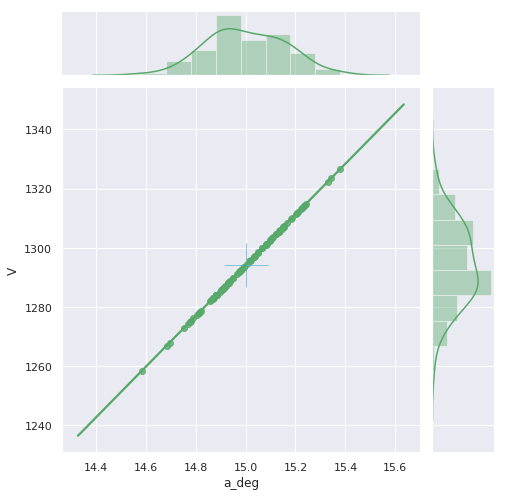

In [24]:
sns.jointplot('a_deg', 'V', data=impulse_exp_df, 
              kind='reg', color='g', height=7);
sns.scatterplot([np.rad2deg(a_mean)], [V_mean], 
                color='c', marker='+', s=2000);

In [25]:
impulse_exp_df.describe()

,a_rad,a_deg,V
count,100.000000,100.000000,100.000000
mean,0.261826,15.001503,1294.223012
std,0.002704,0.154909,13.287939
min,0.254536,14.583819,1258.386894
25%,0.259777,14.884144,1284.156555
50%,0.261653,14.991606,1293.375257
75%,0.263953,15.123369,1304.677113
max,0.268410,15.378778,1326.579604


<center>
    <h3>4. Сравнение моделей <i>2</i> и <i>3</i></h3>
</center>

ЗСЭ


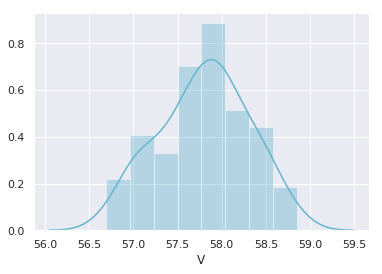

In [31]:
print('ЗСЭ')
sns.distplot(energy_exp_df.V, color='c');

ЗСЭ + ЗСИ


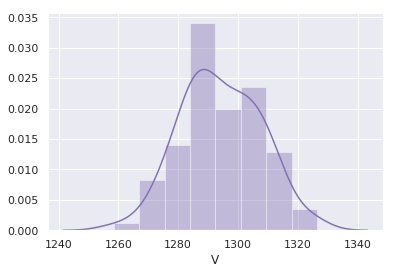

In [32]:
print('ЗСЭ + ЗСИ')
sns.distplot(impulse_exp_df.V, color='m');

In [33]:
impulse_exp_df.V.mean()/energy_exp_df.V.mean()

22.39201955566156

Результаты отличаются примерно в 22 раза

Третья модель считается более точной, потому что в ней мы учитываем Закон Сохранения Энергии